In [200]:
%load_ext autoreload
%autoreload 2

#%pylab
%matplotlib inline  

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tck

from src.utils.plotting import init_plot_style
from src.utils.plotting import ex2_signal_time_frequency
from src.utils.dft import dft
from scipy.fft import fft, fftfreq, fftshift

init_plot_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
x = 10
y = 40
z = np.array([x, y])

N_iter = 100_000

r = np.sqrt(z[0]**2+z[1]**2)
phi = np.arctan2(z[1],z[0])
w = np.array([r,phi]).T
w_hat = np.zeros([N_iter,w.size])

for i in range(N_iter):
    w_hat[i,:] = w+np.random.randn(2)
    #w_hat[i,:] = w+np.random.uniform(-np.pi/2, np.pi/2,2)
    


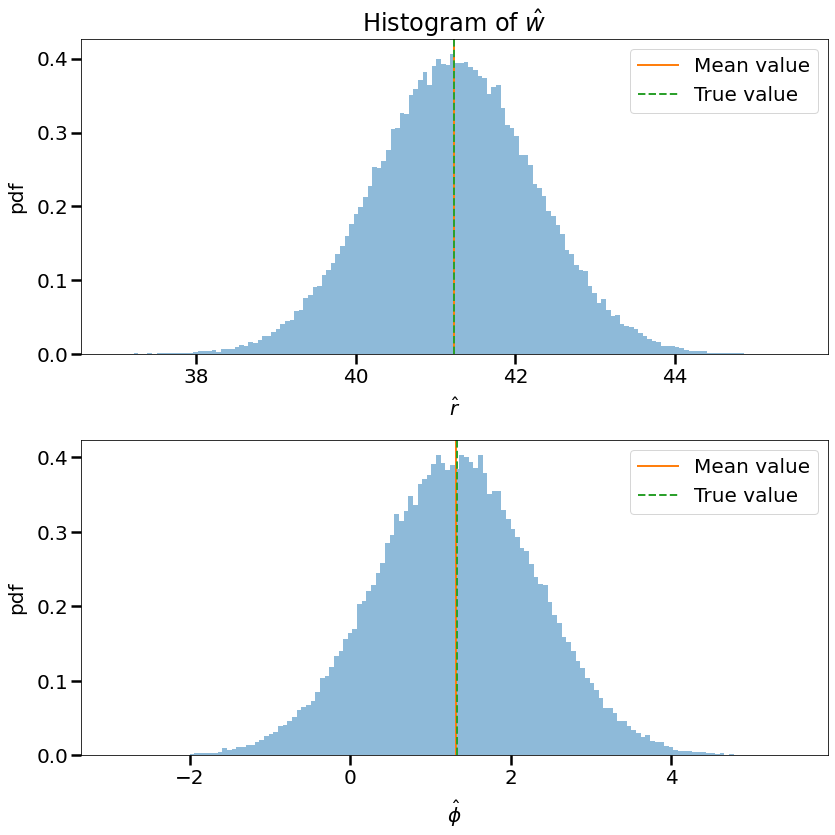

In [202]:
r_hist = np.hstack((w_hat[:,0]))
phi_hist = np.hstack((w_hat[:,1]))

fig,ax=plt.subplots(2,figsize=(12,12))

ax[0].hist(r_hist, bins='auto',alpha = 0.5, density=True)
ax[0].axvline(x=np.mean(r_hist), color='C1',label='Mean value')
ax[0].axvline(x=r, color='C2',linestyle='dashed',label='True value')
ax[0].set_xlabel("$\hat{r}$")
ax[0].set_ylabel("pdf")
ax[0].legend()
ax[1].hist(phi_hist, bins='auto',alpha = 0.5, density=True)
ax[1].axvline(x=np.mean(phi_hist), color='C1',label='Mean value')
ax[1].axvline(x=phi, color='C2',linestyle='dashed',label='True value')
ax[1].set_xlabel("$\hat{\phi}$")
ax[1].set_ylabel("pdf")
ax[1].legend()
ax[0].set_title("Histogram of $\hat{w}$")
plt.tight_layout()

### Estimator 1: 
$\hat{\mathbf{z}}_A$

In [203]:
x_mean_A = np.mean(w_hat[:,0])*np.cos(np.mean(w_hat[:,1]))
y_mean_A =np.mean(w_hat[:,0])*np.sin(np.mean(w_hat[:,1]))

### Estimator 2: 
$\hat{\mathbf{z}}_B$

In [204]:
x_hat_B = w_hat[:,0]*np.cos(w_hat[:,1])
y_hat_B = w_hat[:,0]*np.sin(w_hat[:,1])

x_mean_B = np.mean(x_hat_B)
y_mean_B = np.mean(y_hat_B)

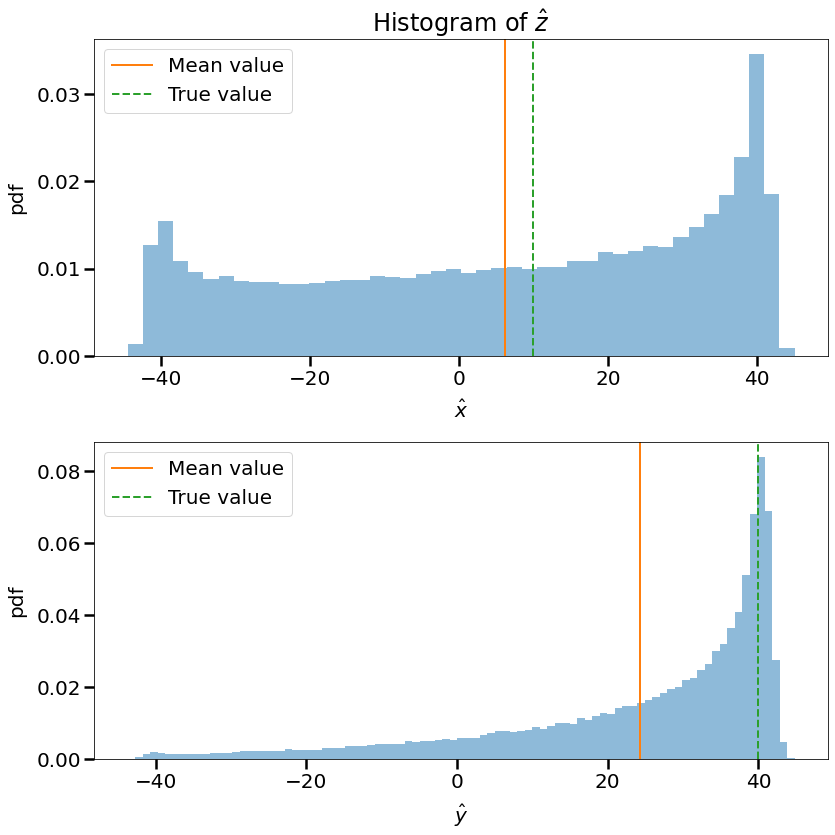

In [205]:
fig,ax=plt.subplots(2,figsize=(12,12))

ax[0].hist(x_hat_B, bins='auto',alpha = 0.5, density=True)
ax[0].axvline(x=x_mean_B, color='C1',label='Mean value')
ax[0].axvline(x=z[0], color='C2',linestyle='dashed',label='True value')
ax[0].set_xlabel("$\hat{x}$")
ax[0].set_ylabel("pdf")
ax[0].legend()
ax[1].hist(y_hat_B, bins='auto',alpha = 0.5, density=True)
ax[1].axvline(x=y_mean_B, color='C1',label='Mean value')
ax[1].axvline(x=z[1], color='C2',linestyle='dashed',label='True value')
ax[1].set_xlabel("$\hat{y}$")
ax[1].set_ylabel("pdf")
ax[1].legend()
ax[0].set_title("Histogram of $\hat{z}$")
plt.tight_layout()

### Comparison:

In [206]:
print('x_true = ',z[0],'  y_true = ',z[1])
print('x_mean_A = ',x_mean_A,'  y_mean_A = ',y_mean_A)
print('x_mean_B = ',x_mean_B,'  y_mean_B = ',y_mean_B)

x_true =  10   y_true =  40
x_mean_A =  10.182817854516136   y_mean_A =  39.95754141993108
x_mean_B =  6.195176373094437   y_mean_B =  24.282872723480374
